Checking gemini_response against labels...
True Positives: 46, True Negatives: 41, False Positives: 9, False Negatives: 4
Accuracy: 0.87


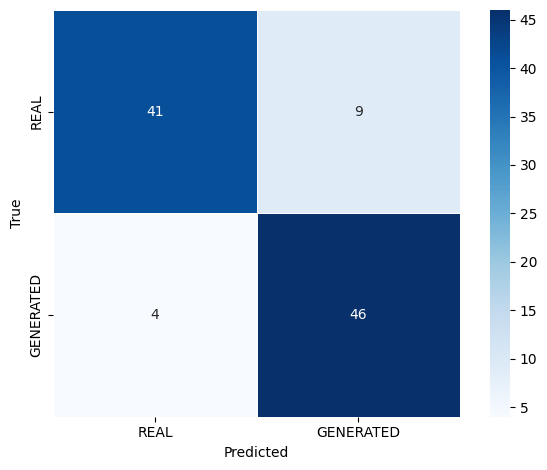

Checking claude_response against labels...
True Positives: 39, True Negatives: 46, False Positives: 4, False Negatives: 11
Accuracy: 0.85


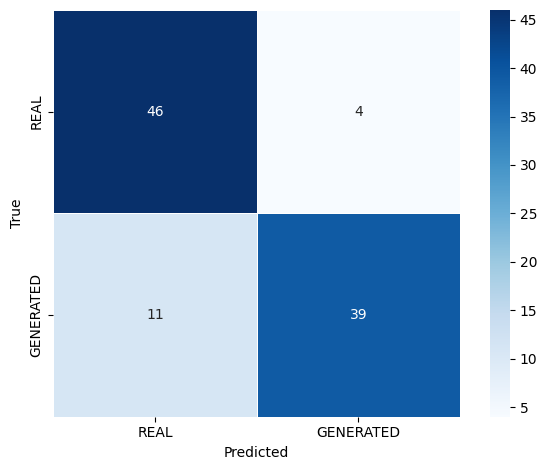

Checking llama_response against labels...
True Positives: 20, True Negatives: 46, False Positives: 4, False Negatives: 30
Accuracy: 0.66


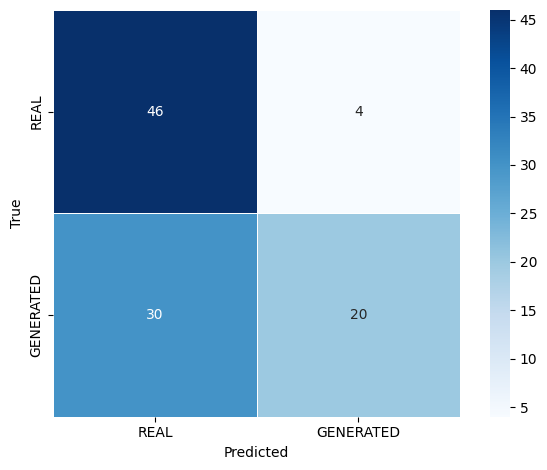

Checking chatgpt_response against labels...
True Positives: 19, True Negatives: 33, False Positives: 17, False Negatives: 31
Accuracy: 0.52


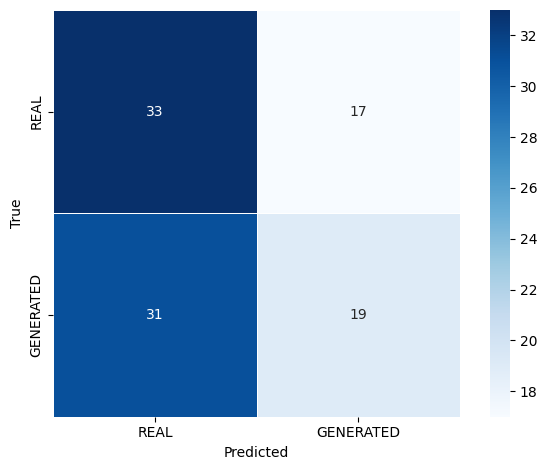

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

curr_dir = os.getcwd()
labels_list = os.path.join(curr_dir, 'samples_for_llms_labels.txt')

for llm_resp in os.listdir(curr_dir):
    tp, tn, fp, fn = 0, 0, 0, 0
    if not llm_resp.endswith('.txt') or llm_resp in ['samples_for_llms_labels.txt', 'samples_for_llms.txt']:
        continue

    print(f"Checking {llm_resp.split('.')[0]} against labels...")
    with open(os.path.join(curr_dir, llm_resp), 'r', encoding='utf-8') as f:
        llm_resp_content = f.read()

    with open(labels_list, 'r', encoding='utf-8') as f:
        labels_content = f.read()

    llm_resp_content = [line for line in llm_resp_content.splitlines() if '#' not in line]
    labels_content = labels_content.splitlines()
    for pred_lbl, true_lbl in zip(llm_resp_content, labels_content):
        pred_lbl = pred_lbl.strip()
        true_lbl = true_lbl.split('.')[1].strip()

        if true_lbl == 'GENERATED':
            if pred_lbl == 'GENERATED':
                tp += 1
            else:
                fn += 1
        elif true_lbl == 'REAL':
            if pred_lbl == 'REAL':
                tn += 1
            else: 
                fp += 1

    print(f"True Positives: {tp}, True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}")
    accuracy = (tp + tn) / 100
    print(f"Accuracy: {accuracy:.2f}")

    cm = np.array([
        [tn, fp],
        [fn, tp]
    ])
    labels = ['REAL', 'GENERATED']

    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels,
                cbar=True,
                linewidths=0.5,
                square=True)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(curr_dir, f'confusion_matrix_{llm_resp.split(".")[0]}.svg'))
    plt.show()


    print('=' * 50)